In [3]:
import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")
tesla_stock = tesla.history(period="max")
tesla_stock.to_csv("Tesla_Stock_Data.csv")
tesla_stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [4]:
import requests
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
tesla_stock.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-20 00:00:00-04:00,233.350006,238.000000,230.050003,236.259995,99028300,0.0,0.0
2025-03-21 00:00:00-04:00,234.990005,249.520004,234.550003,248.710007,132728700,0.0,0.0
2025-03-24 00:00:00-04:00,258.079987,278.640015,256.329987,278.390015,169079900,0.0,0.0
2025-03-25 00:00:00-04:00,283.600006,288.200012,271.279999,288.140015,150361500,0.0,0.0
2025-03-26 00:00:00-04:00,282.660004,284.899994,266.510010,272.059998,153629800,0.0,0.0


In [5]:
import yfinance as yf
import pandas as pd

gamestop = yf.Ticker("GME")
gamestop_stock = gamestop.history(period="max")

gamestop_stock.to_csv("GameStop_Stock_Data.csv")

gamestop_stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [10]:
import pandas as pd
import requests

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

response = requests.get(url, headers=headers)
tables = pd.read_html(response.text)

gme_revenue_df = tables[1]  

gme_revenue_df.columns = ["Date", "Revenue"]

gme_revenue_df["Revenue"] = gme_revenue_df["Revenue"].str.replace("$", "").str.replace(",", "").astype(float)

print(gme_revenue_df.tail())


          Date  Revenue
59  2010-01-31   3524.0
60  2009-10-31   1835.0
61  2009-07-31   1739.0
62  2009-04-30   1981.0
63  2009-01-31   3492.0


/tmp/ipykernel_719/2807489852.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


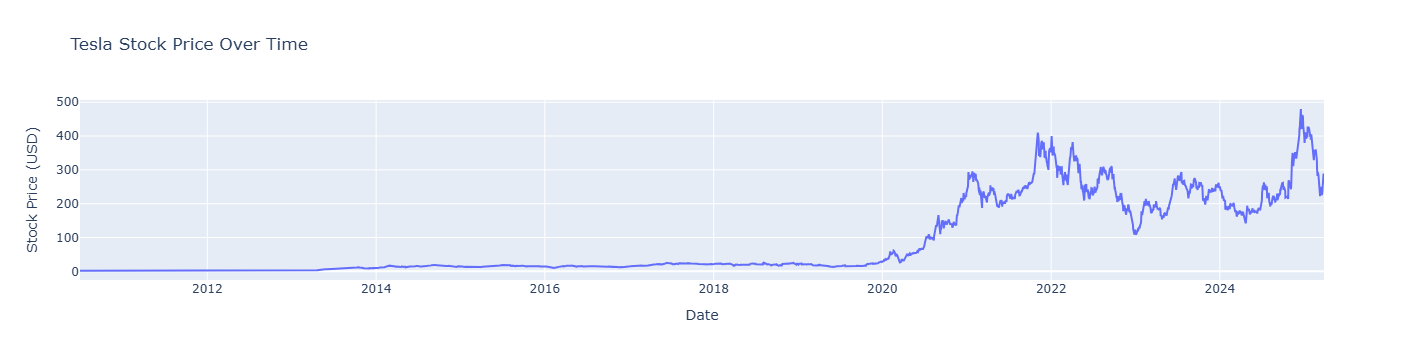

In [13]:
import yfinance as yf
import plotly.graph_objects as go
import pandas as pd

tesla = yf.Ticker("TSLA")
tesla_stock = tesla.history(period="max")
tesla_stock.reset_index(inplace=True)

def make_graph(data, title):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data["Date"], y=data["Close"], mode="lines", name="Stock Price"))
    fig.update_layout(title=title, xaxis_title="Date", yaxis_title="Stock Price (USD)")
    fig.show()

make_graph(tesla_stock, "Tesla Stock Price Over Time")


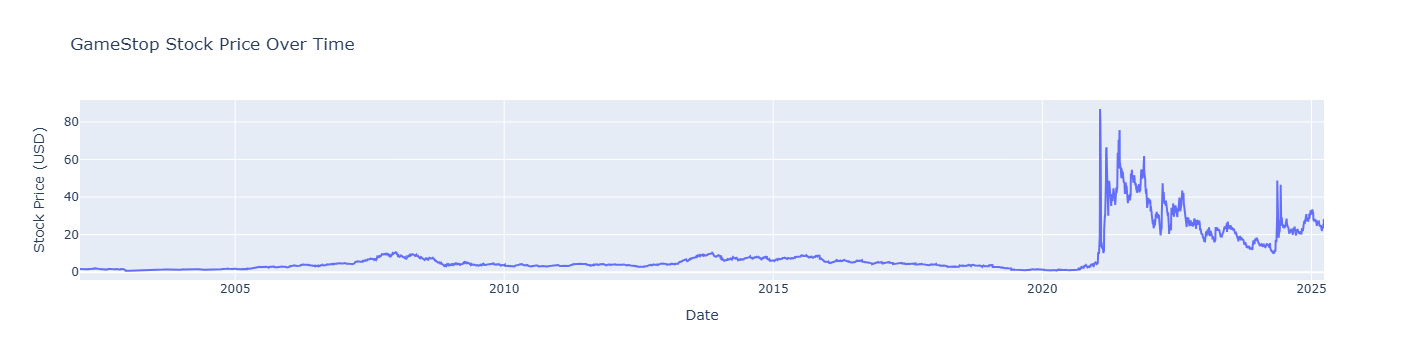

In [14]:
import yfinance as yf
import plotly.graph_objects as go
import pandas as pd

gamestop = yf.Ticker("GME")
gamestop_stock = gamestop.history(period="max")
gamestop_stock.reset_index(inplace=True)

def make_graph(data, title):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data["Date"], y=data["Close"], mode="lines", name="Stock Price"))
    fig.update_layout(title=title, xaxis_title="Date", yaxis_title="Stock Price (USD)")
    fig.show()

make_graph(gamestop_stock, "GameStop Stock Price Over Time")
